<a href="https://colab.research.google.com/github/WooJungE/About_data/blob/main/20230330.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
df = pd.read_csv("/content/drive/MyDrive/data/실습에 사용되는 파일2-20230314/iris.csv"); df.index.name='record'

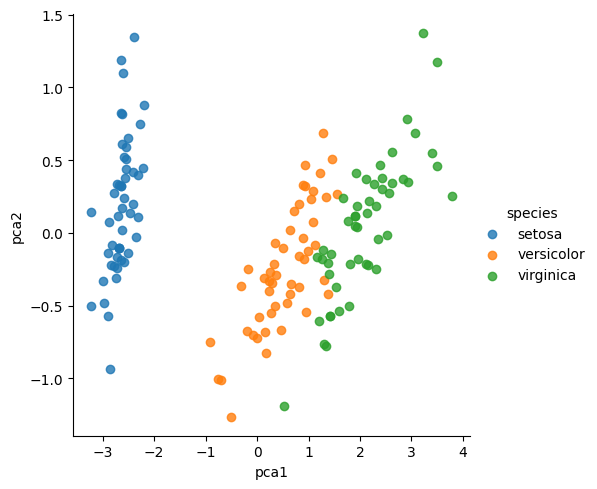

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
out_pca = pca.fit_transform(df[['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm',]])
df_pca = pd.DataFrame(data = out_pca, columns = ['pca1', 'pca2'])
df_pca = pd.concat([df_pca, df[['species']]], axis = 1)
sns.lmplot(x='pca1', y='pca2', hue='species', data=df_pca, fit_reg=False)

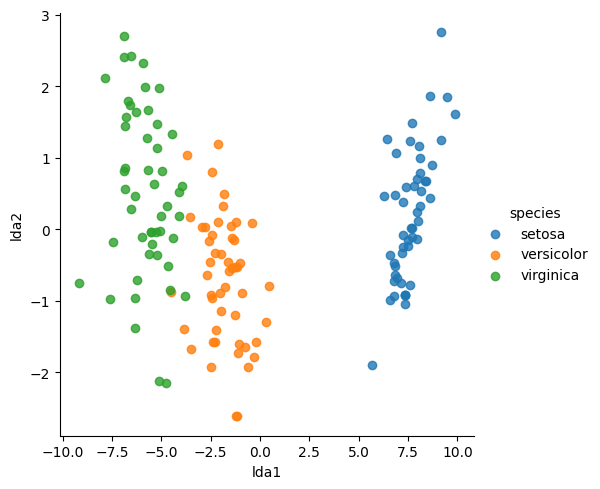

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
cols = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm']
lda.fit(df[cols], df['species'])
out_lda = lda.transform(df[cols])
df_lda = pd.DataFrame(data = out_lda, columns = ['lda1', 'lda2'])
df_lda = pd.concat([df_lda, df[['species']]], axis =1)
sns.lmplot(x='lda1', y='lda2', hue='species', data=df_lda, fit_reg=False)

In [9]:
print("shape of data in (rows, columns) is " + str(df.shape))
print(df.head())
df.describe().transpose()

shape of data in (rows, columns) is (150, 5)
        sepal length in cm  sepal width in cm  petal length in cm  \
record                                                              
0                      5.1                3.5                 1.4   
1                      4.9                3.0                 1.4   
2                      4.7                3.2                 1.3   
3                      4.6                3.1                 1.5   
4                      5.0                3.6                 1.4   

        petal width in cm species  
record                             
0                     0.2  setosa  
1                     0.2  setosa  
2                     0.2  setosa  
3                     0.2  setosa  
4                     0.2  setosa  


,count,mean,std,min,25%,50%,75%,max
sepal length in cm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width in cm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length in cm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width in cm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


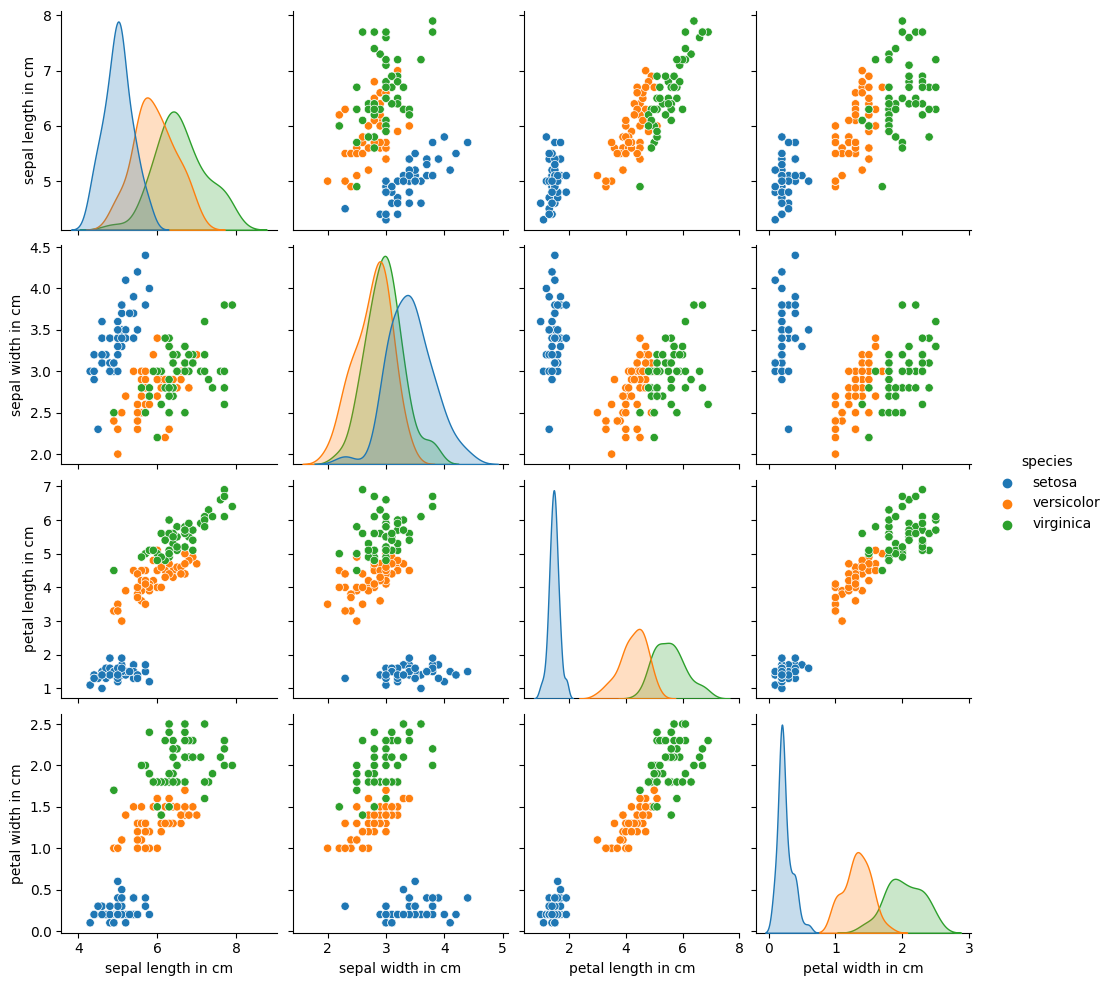

In [10]:
sns.pairplot(df,hue='species')

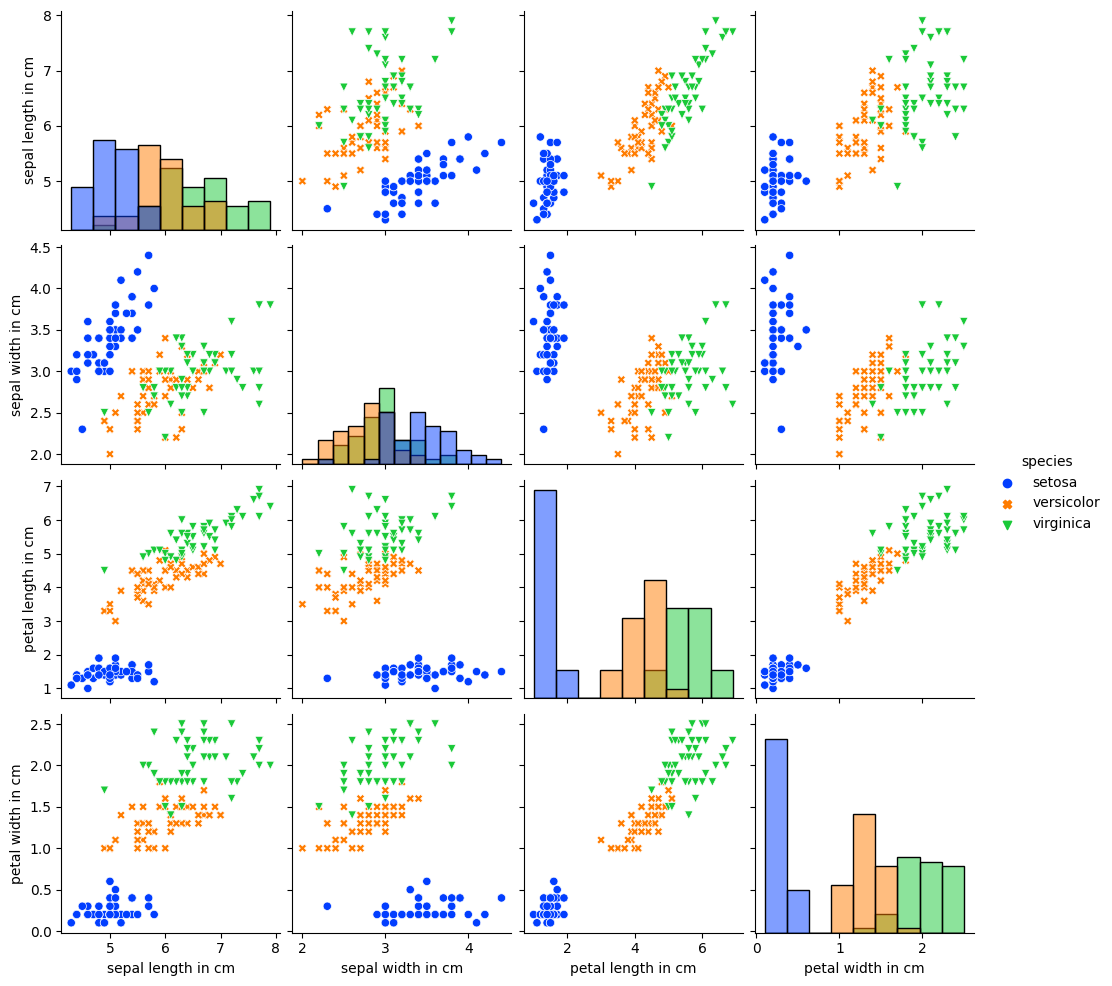

In [11]:
sns.pairplot(df,hue='species', diag_kind='hist', palette='bright', markers=['o', 'X', 'v'])

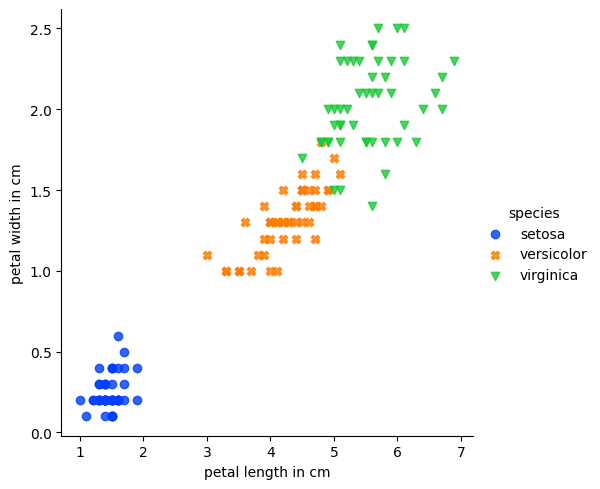

In [12]:
sns.lmplot(x='petal length in cm', y='petal width in cm', hue = "species", data = df, fit_reg=False, palette='bright', markers=['o', 'X', 'v'])

<Axes: xlabel='species', ylabel='petal length in cm'>

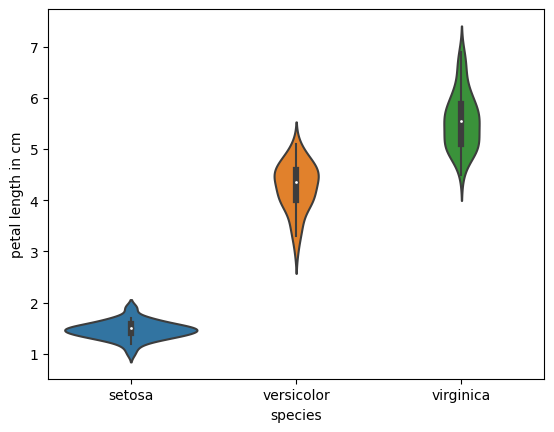

In [13]:
sns.violinplot(x='species', y='petal length in cm', data=df)

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
out_pca = pca.fit_transform(df[['sepal length in cm', 'sepal width in cm',
                    'petal length in cm', 'petal width in cm']])

In [16]:
df_pca = pd.DataFrame(data = out_pca, columns=['pca1', 'pca2'])

       pca1      pca2 species
0 -2.684207  0.326607  setosa
1 -2.715391 -0.169557  setosa
2 -2.889820 -0.137346  setosa
3 -2.746437 -0.311124  setosa
4 -2.728593  0.333925  setosa


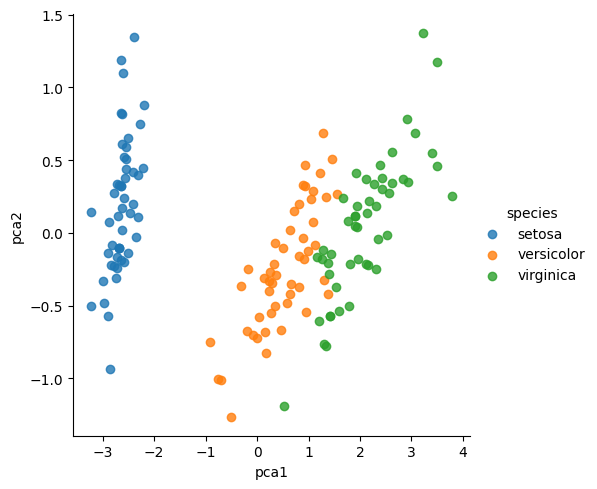

In [17]:
df_pca = pd.concat([df_pca, df[['species']]], axis=1)
print(df_pca.head())
sns.lmplot(x="pca1", y = "pca2", hue="species", data=df_pca, fit_reg=False)

       lda1      lda2 species
0  8.084953  0.328454  setosa
1  7.147163 -0.755473  setosa
2  7.511378 -0.238078  setosa
3  6.837676 -0.642885  setosa
4  8.157814  0.540639  setosa


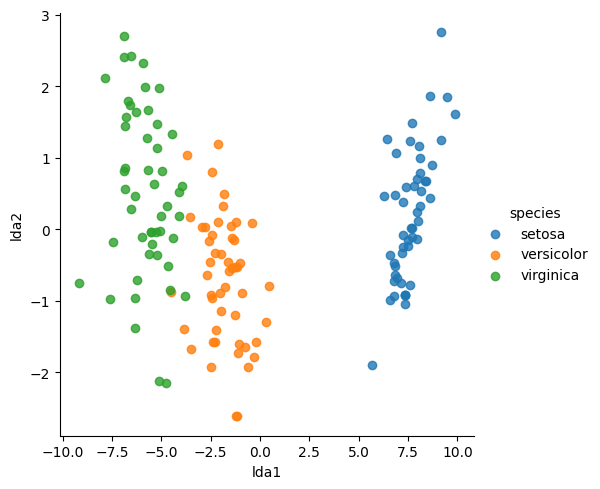

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
lda = LinearDiscriminantAnalysis(n_components=2)
out_lda = lda.fit_transform(X=df.iloc[:,:4], y =df['species'])
df_lda = pd.DataFrame(data = out_lda, columns = ['lda1', 'lda2'])
df_lda = pd.concat([df_lda, df[['species']]], axis = 1)
print(df_lda.head())
sns.lmplot(x="lda1", y="lda2", hue="species", data=df_lda, fit_reg=False)

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmns = KMeans(n_clusters = 3, random_state=42)
out_kms_pca = kmns.fit_predict(out_pca)
silhouette = silhouette_score(out_pca, out_kms_pca)
print("PCA silhouette score = " + str(silhouette))
out_kms_lda = kmns.fit_predict(out_lda)
silhouette = silhouette_score(out_lda, out_kms_lda)
print("LDA silhouette score = %2f " % silhouette)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


PCA silhouette score = 0.5975649100584399
LDA silhouette score = 0.656399 
